In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('C:\\Users\\dhanu\\t20wc.csv')


In [5]:
df.head()

,batter,bowler,non_striker,runs_batter,runs_extras,runs_total,wickets_0_player_out,wickets_0_kind,team,over,...,wickets_0_fielders_0_name,review_by,review_umpire,review_batter,review_decision,review_type,extras_legbyes,wickets_0_fielders_1_name,extras_noballs,extras_penalty
0,Shayan Jahangir,Arshdeep Singh,SR Taylor,0,0,0,Shayan Jahangir,lbw,United States of America,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AGS Gous,Arshdeep Singh,SR Taylor,0,0,0,NaN,NaN,United States of America,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AGS Gous,Arshdeep Singh,SR Taylor,0,0,0,NaN,NaN,United States of America,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AGS Gous,Arshdeep Singh,SR Taylor,0,1,1,NaN,NaN,United States of America,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AGS Gous,Arshdeep Singh,SR Taylor,2,0,2,NaN,NaN,United States of America,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
df.isnull().sum()

batter                         0
bowler                         0
non_striker                    0
runs_batter                    0
runs_extras                    0
runs_total                     0
wickets_0_player_out         225
wickets_0_kind               225
team                           0
over                           0
extras_wides                 231
wickets_0_fielders_0_name    228
review_by                    235
review_umpire                235
review_batter                235
review_decision              235
review_type                  235
extras_legbyes               234
wickets_0_fielders_1_name    235
extras_noballs               235
extras_penalty               235
dtype: int64

In [16]:
df.dtypes

batter                        object
bowler                        object
non_striker                   object
runs_batter                    int64
runs_extras                    int64
runs_total                     int64
wickets_0_player_out          object
wickets_0_kind                object
team                          object
over                           int64
extras_wides                 float64
wickets_0_fielders_0_name     object
review_by                     object
review_umpire                 object
review_batter                 object
review_decision               object
review_type                   object
extras_legbyes               float64
wickets_0_fielders_1_name     object
extras_noballs               float64
extras_penalty               float64
dtype: object

**Total Runs by each team**

In [20]:
total_runs = df.groupby('team')['runs_total'].sum()
total_runs

team
India                       111
United States of America    110
Name: runs_total, dtype: int64

**Total wicktes taken by each team**

In [34]:
total_wickets = df['wickets_0_player_out'].notna().groupby(df['team']).sum()
total_wickets

team
India                       3
United States of America    8
Name: wickets_0_player_out, dtype: int64

**Total Extras**

In [41]:
total_extras = df[['team','runs_extras','extras_wides','extras_noballs','extras_legbyes','extras_penalty']].groupby('team').sum()
total_extras

,runs_extras,extras_wides,extras_noballs,extras_legbyes,extras_penalty
team,,,,,
India,9,2.0,1.0,1.0,5.0
United States of America,8,7.0,0.0,1.0,0.0


**Runs scored by Each Batter**

In [11]:
batter_runs = df.groupby('batter')['runs_batter'].sum()
batter_runs

batter
AGS Gous             2
Aaron Jones         11
CJ Anderson         15
Harmeet Singh       10
Jasdeep Singh        2
NR Kumar            27
RG Sharma            3
RR Pant             18
S Dube              31
SA Yadav            50
SC van Schalkwyk    11
SR Taylor           24
Shayan Jahangir      0
V Kohli              0
Name: runs_batter, dtype: int64

**Balls faced by Each batter**

In [13]:
balls_faced = df.groupby('batter').size()
balls_faced

batter
AGS Gous             6
Aaron Jones         22
CJ Anderson         12
Harmeet Singh       10
Jasdeep Singh        7
NR Kumar            24
RG Sharma            6
RR Pant             20
S Dube              37
SA Yadav            49
SC van Schalkwyk    10
SR Taylor           31
Shayan Jahangir      1
V Kohli              1
dtype: int64

**Strike rate of each batter**

In [15]:
strike_rate = (batter_runs/balls_faced)*100
strike_rate

batter
AGS Gous             33.333333
Aaron Jones          50.000000
CJ Anderson         125.000000
Harmeet Singh       100.000000
Jasdeep Singh        28.571429
NR Kumar            112.500000
RG Sharma            50.000000
RR Pant              90.000000
S Dube               83.783784
SA Yadav            102.040816
SC van Schalkwyk    110.000000
SR Taylor            77.419355
Shayan Jahangir       0.000000
V Kohli               0.000000
dtype: float64

**Boundaries hit by each batter**

In [17]:
boundaries = df[(df['runs_batter'] == 4)|(df['runs_batter']==6)].groupby(['batter','runs_batter']).size().unstack(fill_value=0)
boundaries

runs_batter,4,6
batter,,
Aaron Jones,0,1
CJ Anderson,1,1
Harmeet Singh,0,1
NR Kumar,2,1
RR Pant,1,1
S Dube,1,1
SA Yadav,2,2
SC van Schalkwyk,1,0
SR Taylor,0,2


**Wickets taken by each bowler**

In [19]:
wickets_taken = df['wickets_0_player_out'].notna().groupby(df['bowler']).sum()
wickets_taken

bowler
AR Patel            1
Ali Khan            1
Arshdeep Singh      4
CJ Anderson         0
HH Pandya           2
JJ Bumrah           0
Jasdeep Singh       0
Mohammed Siraj      1
S Dube              0
SC van Schalkwyk    0
SN Netravalkar      2
Name: wickets_0_player_out, dtype: int64

**Runs conceded by each bowler**

In [21]:
runs_conceded = df.groupby('bowler')['runs_total'].sum()
runs_conceded

bowler
AR Patel            25
Ali Khan            22
Arshdeep Singh       9
CJ Anderson         22
HH Pandya           15
JJ Bumrah           25
Jasdeep Singh       24
Mohammed Siraj      25
S Dube              11
SC van Schalkwyk    25
SN Netravalkar      18
Name: runs_total, dtype: int64

**Balls bowled by each bowler**

In [23]:
balls_bowled = df.groupby('bowler').size()
balls_bowled

bowler
AR Patel            19
Ali Khan            21
Arshdeep Singh      25
CJ Anderson         19
HH Pandya           24
JJ Bumrah           25
Jasdeep Singh       25
Mohammed Siraj      24
S Dube               6
SC van Schalkwyk    24
SN Netravalkar      24
dtype: int64

**Economy rate of each bowler**

In [25]:
economy_rate = runs_conceded/(balls_bowled/6)
economy_rate

bowler
AR Patel             7.894737
Ali Khan             6.285714
Arshdeep Singh       2.160000
CJ Anderson          6.947368
HH Pandya            3.750000
JJ Bumrah            6.000000
Jasdeep Singh        5.760000
Mohammed Siraj       6.250000
S Dube              11.000000
SC van Schalkwyk     6.250000
SN Netravalkar       4.500000
dtype: float64

**Dot balls bowled by each bowler**

In [27]:
dot_balls = df[df['runs_total']==0].groupby('bowler').size()
dot_balls

bowler
AR Patel             5
Ali Khan             7
Arshdeep Singh      17
CJ Anderson          8
HH Pandya           18
JJ Bumrah           14
Jasdeep Singh       11
Mohammed Siraj      11
S Dube               3
SC van Schalkwyk     8
SN Netravalkar      13
dtype: int64

In [29]:
batter_stats = pd.DataFrame({
    'Runs': batter_runs,
    'Balls Faced': balls_faced,
    'Strike Rate' : strike_rate,
}).join(boundaries)

bowler_stats = pd.DataFrame({
    'Wickets': wickets_taken,
    'Runs Conceded': runs_conceded,
    'Balls Bowled': balls_bowled,
    'Economy Rate': economy_rate,
    'Dot Balls': dot_balls,
})

print(batter_stats)
print(bowler_stats)

                  Runs  Balls Faced  Strike Rate    4    6
batter                                                    
AGS Gous             2            6    33.333333  NaN  NaN
Aaron Jones         11           22    50.000000  0.0  1.0
CJ Anderson         15           12   125.000000  1.0  1.0
Harmeet Singh       10           10   100.000000  0.0  1.0
Jasdeep Singh        2            7    28.571429  NaN  NaN
NR Kumar            27           24   112.500000  2.0  1.0
RG Sharma            3            6    50.000000  NaN  NaN
RR Pant             18           20    90.000000  1.0  1.0
S Dube              31           37    83.783784  1.0  1.0
SA Yadav            50           49   102.040816  2.0  2.0
SC van Schalkwyk    11           10   110.000000  1.0  0.0
SR Taylor           24           31    77.419355  0.0  2.0
Shayan Jahangir      0            1     0.000000  NaN  NaN
V Kohli              0            1     0.000000  NaN  NaN
                  Wickets  Runs Conceded  Balls Bowled  

**Distribution of Runs Scored by Batter**

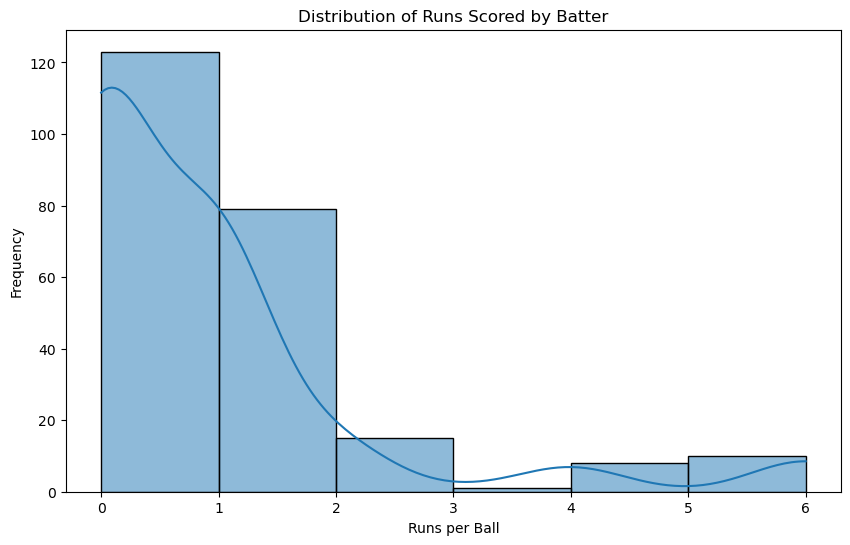

In [92]:
plt.figure(figsize=(10,6))

sns.histplot(df['runs_batter'],bins = 6, kde=True)
plt.title('Distribution of Runs Scored by Batter')
plt.xlabel('Runs per Ball')
plt.ylabel('Frequency')
plt.show()

**Total Runs by Batter**

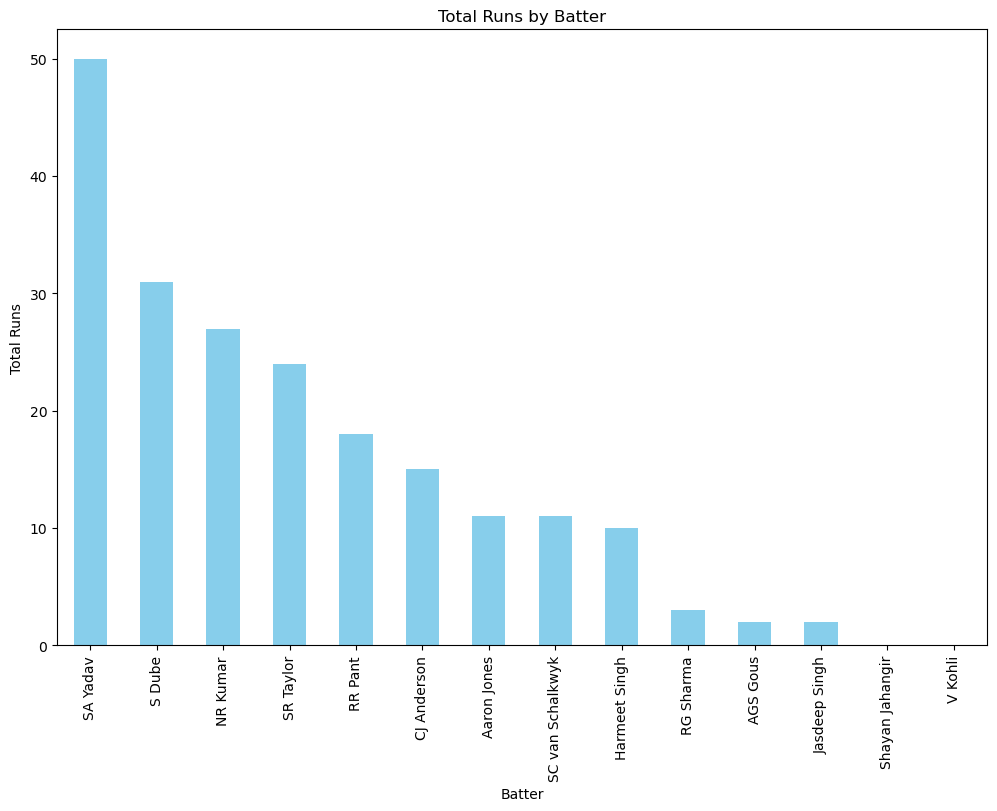

In [96]:
batter_runs = df.groupby('batter')['runs_batter'].sum().sort_values(ascending = False)

plt.figure(figsize=(12, 8))
batter_runs.plot(kind='bar',color = 'skyblue')

plt.title('Total Runs by Batter')
plt.xlabel('Batter')
plt.ylabel('Total Runs')
plt.xticks(rotation=90)
plt.show()


**Number of 4s and 6s by Batter**

<Figure size 1200x800 with 0 Axes>

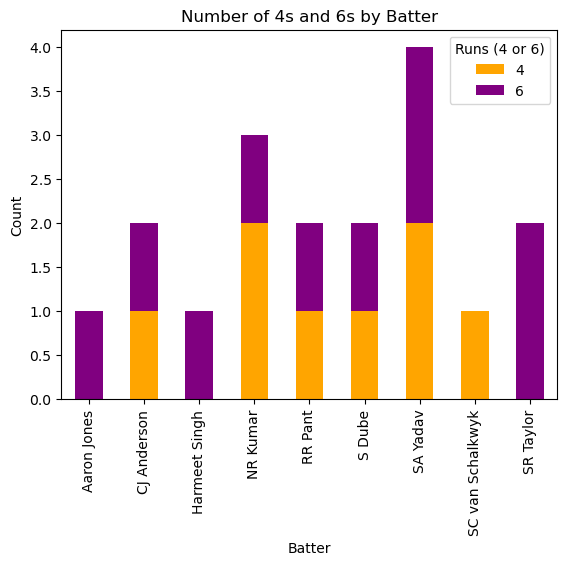

In [101]:
boundaries = df[df['runs_batter'].isin([4,6])].groupby(['batter','runs_batter']).size().unstack(fill_value=0)


plt.figure(figsize=(12, 8))
boundaries.plot(kind='bar',stacked=True,color=['orange','purple'])
plt.title('Number of 4s and 6s by Batter')
plt.xlabel('Batter')
plt.ylabel('Count')
plt.legend(title='Runs (4 or 6)')
plt.xticks(rotation=90)
plt.show()

**Average Runs per Over**

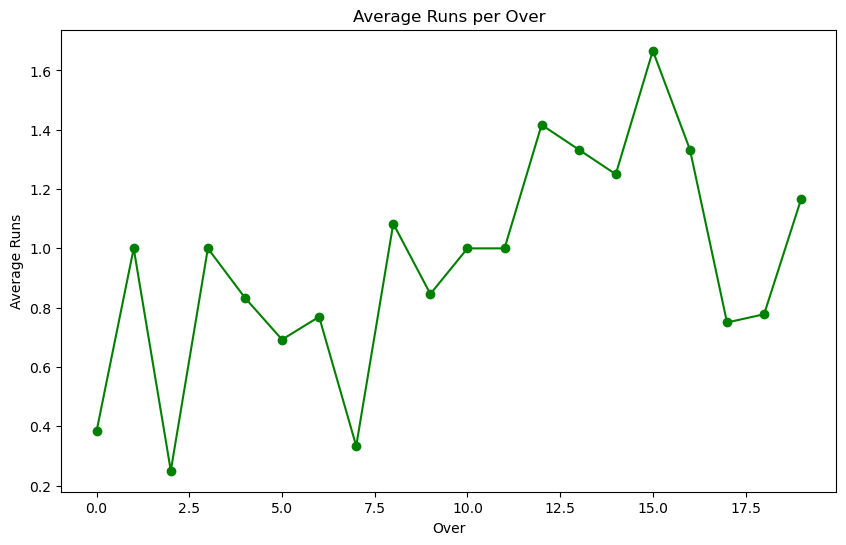

In [107]:
over_runs = df.groupby('over')['runs_total'].mean()
plt.figure(figsize=(10, 6))
over_runs.plot(kind='line',marker='o',color='green')
plt.title('Average Runs per Over')
plt.xlabel('Over')
plt.ylabel('Average Runs')
plt.show()

**Extras by Type**

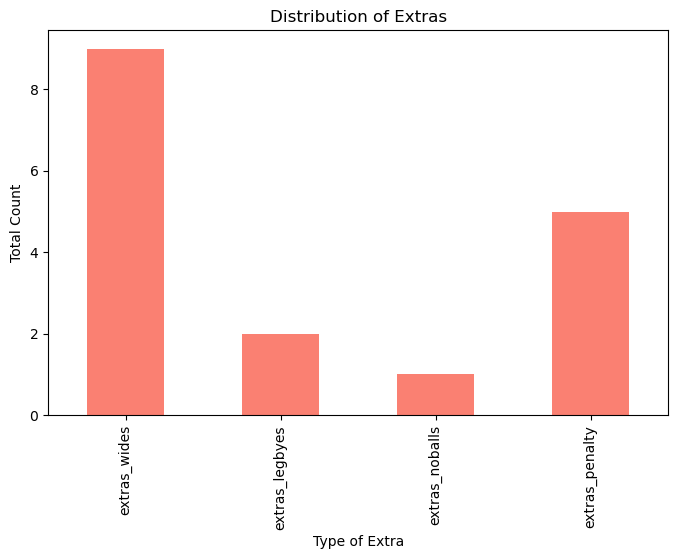

In [110]:
extras = df[['extras_wides','extras_legbyes','extras_noballs','extras_penalty']].sum()

plt.figure(figsize=(8, 5))
extras.plot(kind='bar',color='salmon')

plt.title('Distribution of Extras')
plt.xlabel('Type of Extra')
plt.ylabel('Total Count')
plt.show()

**Wickets by Type of Dismissal**

C:\Users\dhanu\AppData\Local\Temp\ipykernel_19952\2047837497.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x='wickets_0_kind',order=df['wickets_0_kind'].value_counts().index,palette='coolwarm')


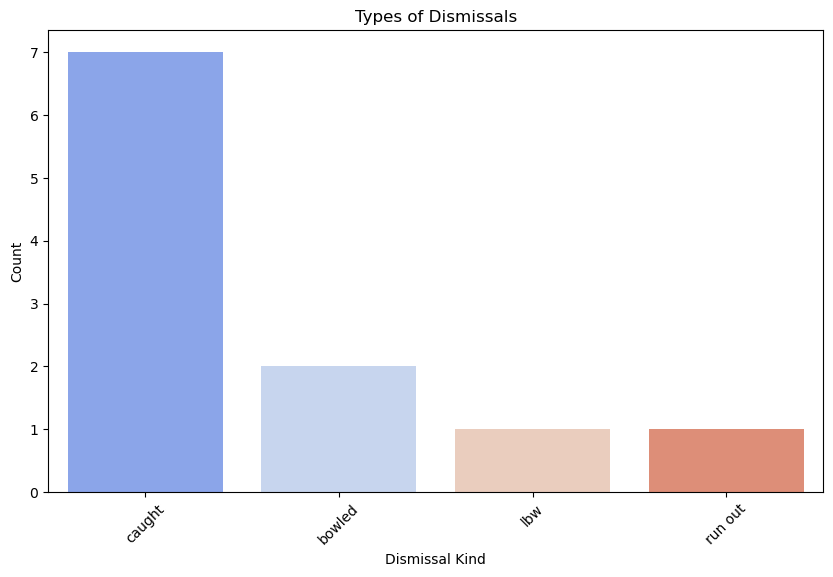

In [115]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df,x='wickets_0_kind',order=df['wickets_0_kind'].value_counts().index,palette='coolwarm')
plt.title('Types of Dismissals')
plt.xlabel('Dismissal Kind')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

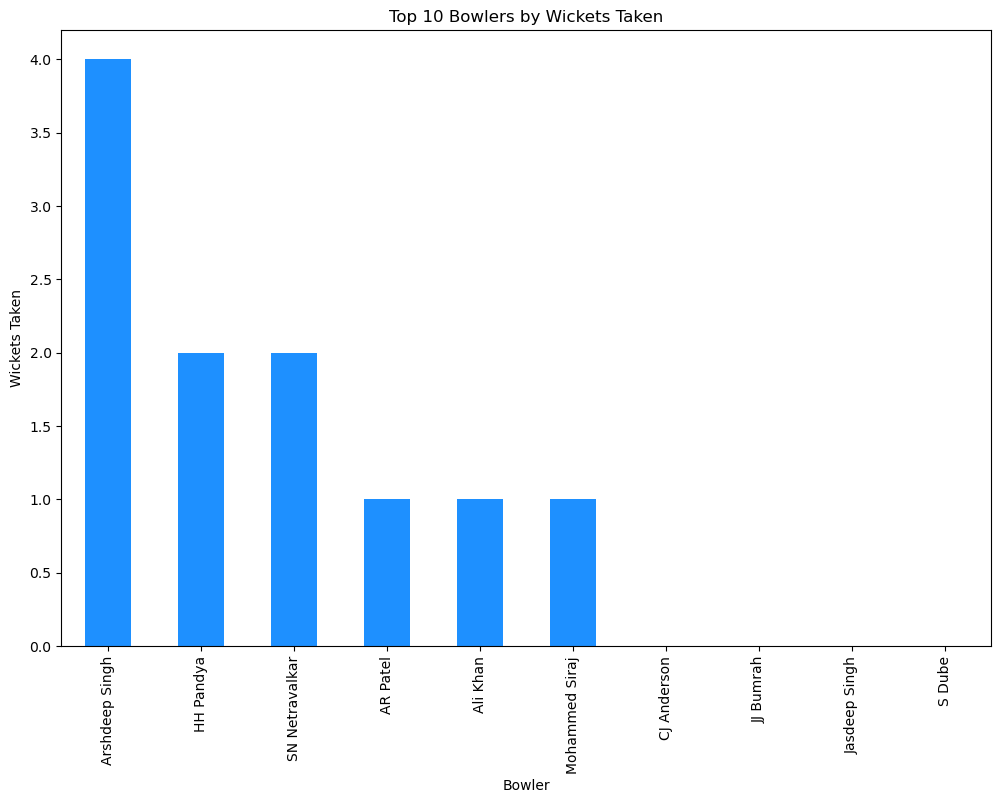

In [119]:
top_bowlers = df['wickets_0_player_out'].groupby(df['bowler']).count().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 8))
top_bowlers.plot(kind='bar',color='dodgerblue')
plt.title('Top 10 Bowlers by Wickets Taken')
plt.xlabel('Bowler')
plt.ylabel('Wickets Taken')
plt.xticks(rotation=90)
plt.show()

C:\Users\dhanu\AppData\Local\Temp\ipykernel_19952\1677698129.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x='team',y='runs_total',palette='muted')


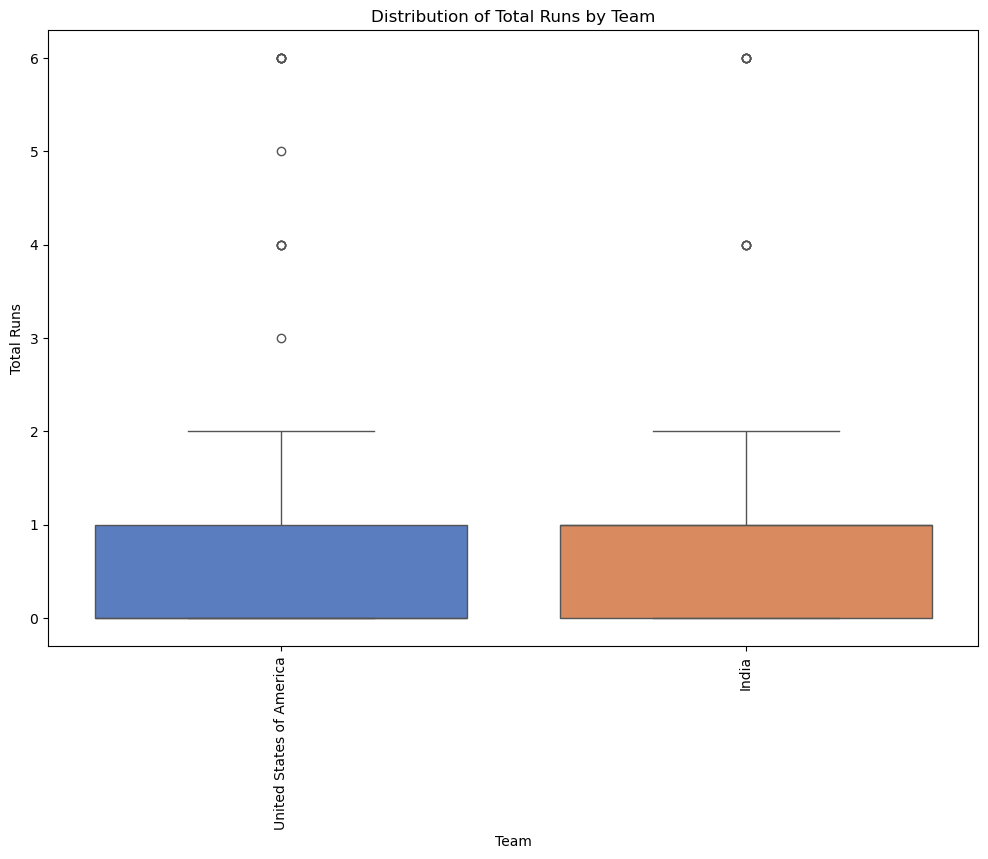

In [121]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df,x='team',y='runs_total',palette='muted')

plt.title('Distribution of Total Runs by Team')
plt.xlabel('Team')
plt.ylabel('Total Runs')
plt.xticks(rotation=90)
plt.show()

**Progression of Runs**

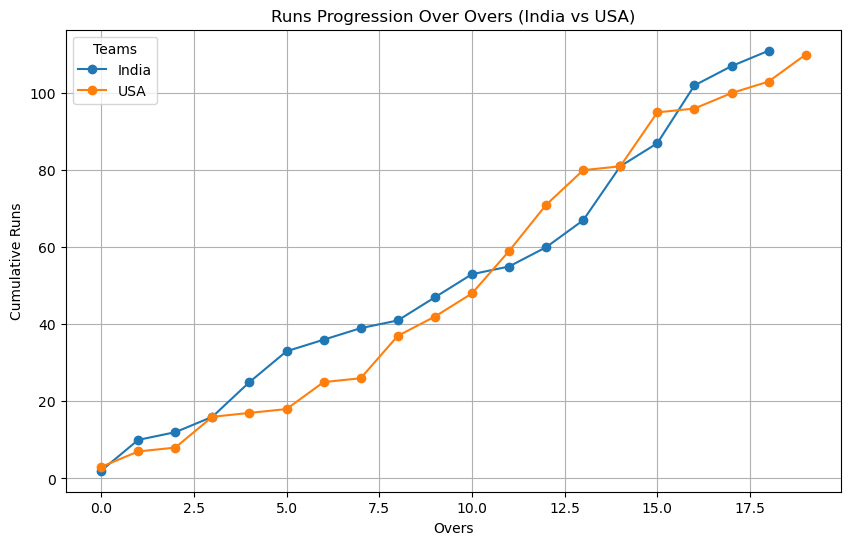

In [138]:
import matplotlib.pyplot as plt


india_runs_progression = df[df['team']=='India'].groupby('over')['runs_total'].sum().cumsum()
usa_runs_progression = df[df['team'] == 'United States of America'].groupby('over')['runs_total'].sum().cumsum()

plt.figure(figsize=(10, 6))

plt.plot(india_runs_progression.index, india_runs_progression.values, marker='o', label='India')


plt.plot(usa_runs_progression.index, usa_runs_progression.values, marker='o', label='USA')


plt.title('Runs Progression Over Overs (India vs USA)')
plt.xlabel('Overs')
plt.ylabel('Cumulative Runs')
plt.legend(title='Teams')
plt.grid(True)
plt.show()


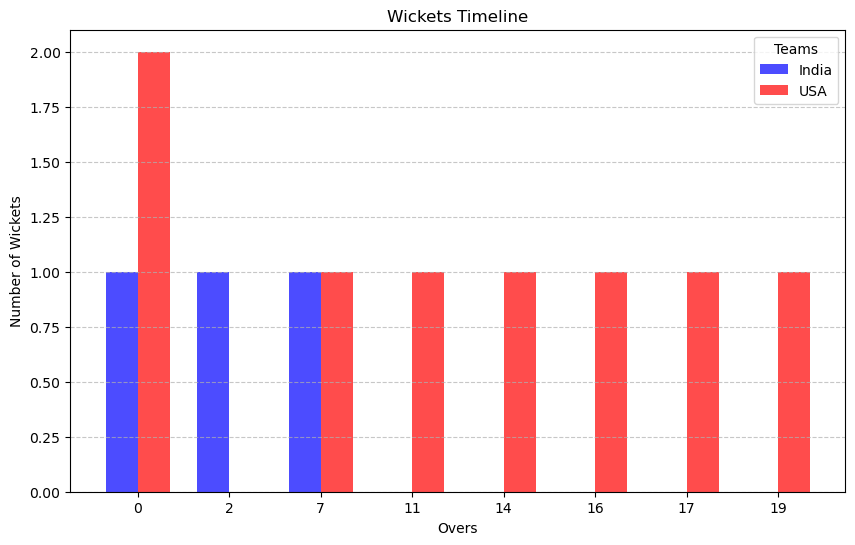

In [158]:
import matplotlib.pyplot as plt
import numpy as np


india_wickets = df[(df['team'] == 'India') & df['wickets_0_player_out'].notna()].groupby('over').size()
usa_wickets = df[(df['team'] == 'United States of America') & df['wickets_0_player_out'].notna()].groupby('over').size()


overs = sorted(set(india_wickets.index).union(usa_wickets.index))


india_wickets = india_wickets.reindex(overs, fill_value=0)
usa_wickets = usa_wickets.reindex(overs, fill_value=0)

bar_width = 0.35
index = np.arange(len(overs))

# Plot using Matplotlib
plt.figure(figsize=(10, 6))

# Bar plot for India
plt.bar(index, india_wickets, width=bar_width, color='blue', label='India', alpha=0.7)

plt.bar(index + bar_width, usa_wickets, width=bar_width, color='red', label='USA', alpha=0.7)

plt.title('Wickets Timeline')
plt.xlabel('Overs')
plt.ylabel('Number of Wickets')
plt.xticks(index + bar_width / 2, overs)
plt.legend(title='Teams')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


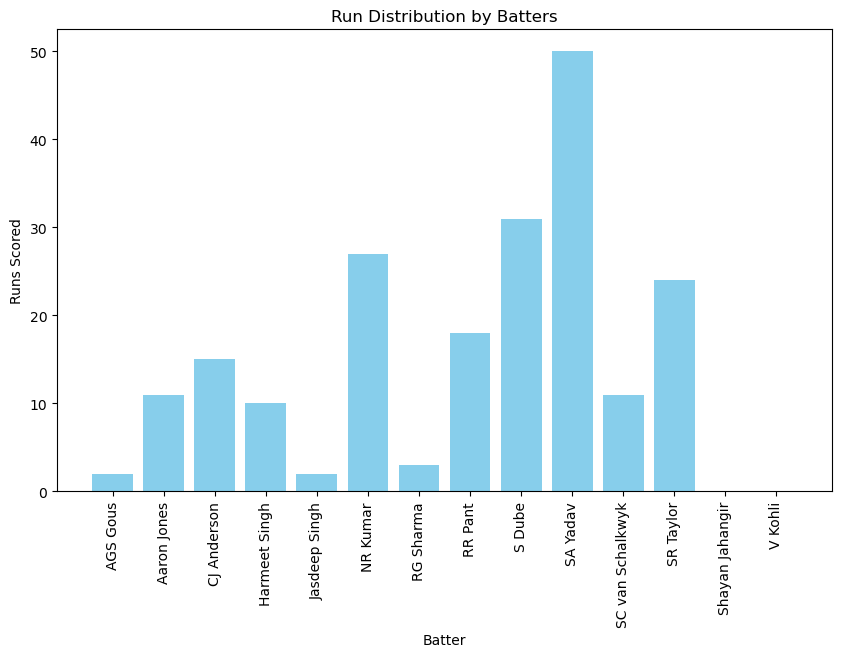

In [31]:
plt.figure(figsize=(10,6))

plt.bar(batter_stats.index,batter_stats['Runs'],color='skyblue')

plt.title('Run Distribution by Batters')
plt.xlabel('Batter')
plt.ylabel('Runs Scored')

# Rotating x-axis labels for readability
plt.xticks(rotation=90)

# Display the plot
plt.show()

C:\Users\dhanu\AppData\Local\Temp\ipykernel_16376\2661915228.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  bowler_stats['Economy Rate'][i],
C:\Users\dhanu\AppData\Local\Temp\ipykernel_16376\2661915228.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  bowler_stats['Wickets'][i] + 0.5,


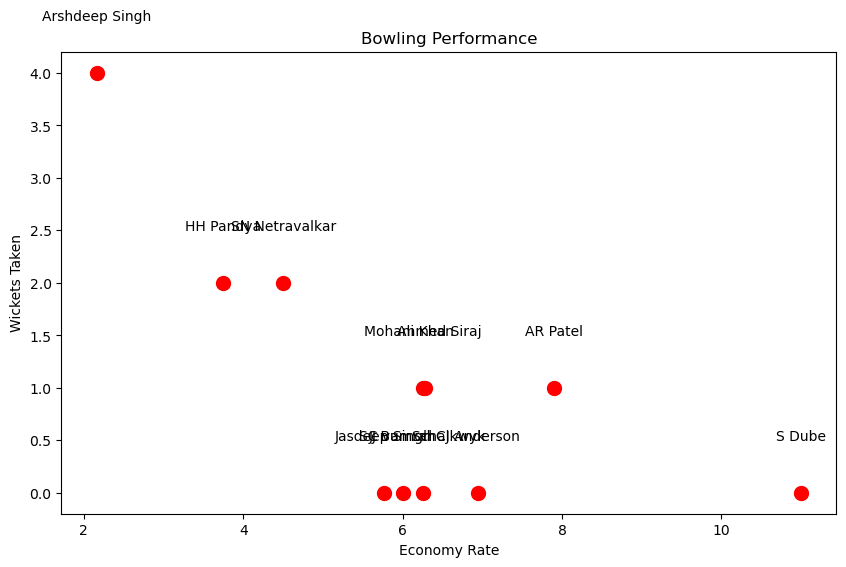

In [35]:
plt.figure(figsize=(10, 6))

plt.scatter(
    bowler_stats['Economy Rate'],
    bowler_stats['Wickets'],
    color = 'red',
    s= 100,
    label = 'Bowlers'
)


for i, bowler in enumerate(bowler_stats.index):
    plt.text(
        bowler_stats['Economy Rate'][i],
        bowler_stats['Wickets'][i] + 0.5,
        bowler,
        ha = 'center',
        fontsize = 10,
        color = 'black'
    )

plt.title('Bowling Performance')
plt.xlabel('Economy Rate')
plt.ylabel('Wickets Taken')


plt.show()